In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.ar_model import AR, ARResults

In [2]:
df = pd.read_csv('../Data/uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


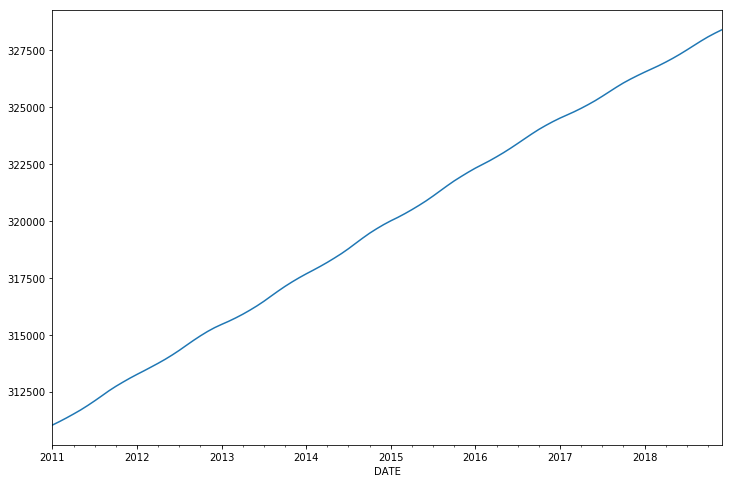

In [4]:
df['PopEst'].plot(figsize=(12, 8)).autoscale(axis='x', tight=True)

- The whole process of time series forecasting
1. Split model into training and test data and fit the model
2.  Evaluate on test set
3. Fit the model again on the full set of records and Forecast using the fitted model

In [5]:
len(df)

96

#### 1. Fit model

In [16]:
train = df.iloc[:84]
test = df.iloc[84:]

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1, method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n {AR1fit.params}')

Lag: 1
Coefficients:
 const        116.976765
L1.PopEst      0.999632
dtype: float64


#### 2. Evaluate on Test Set

In [19]:
start = len(train)
end = start + len(test) - 1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) PREDICTIONS')

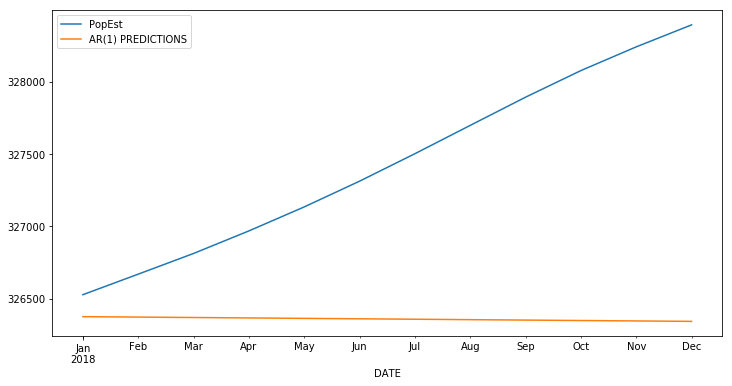

In [20]:
test['PopEst'].plot(figsize=(12, 6), legend=True)
predictions1.plot(legend=True)

#### Fit an AR(2) Model

In [21]:
AR2fit = model.fit(maxlag=2, method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n {AR2fit.params}')

Lag: 2
Coefficients:
 const        125.131589
L1.PopEst      1.996763
L2.PopEst     -0.997156
dtype: float64


In [22]:
start = len(train)
end = start + len(test) - 1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) PREDICTIONS')

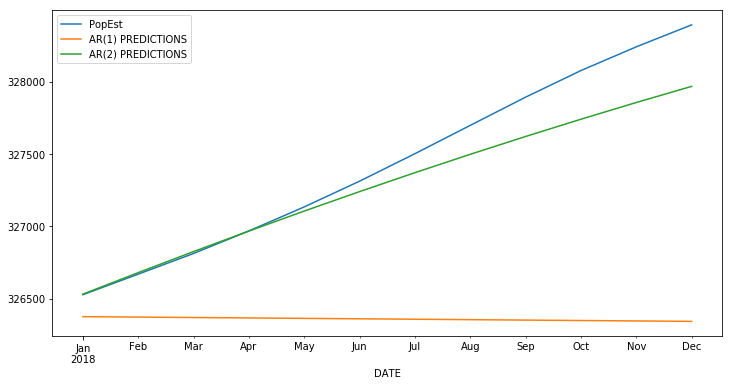

In [23]:
test['PopEst'].plot(figsize=(12, 6), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

#### Fit an AR(p) model where statsmodels chooses p

In [24]:
# we omit the maxlag param and let the statsmodel choose the p
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n {ARfit.params}')

Lag: 11
Coefficients:
 const         96.155851
L1.PopEst      2.250351
L2.PopEst     -2.079214
L3.PopEst      1.730716
L4.PopEst     -1.543799
L5.PopEst      0.979604
L6.PopEst     -0.991224
L7.PopEst      1.076086
L8.PopEst     -0.434709
L9.PopEst      0.211064
L10.PopEst    -0.177350
L11.PopEst    -0.021827
dtype: float64


In [25]:
start = len(train)
end = start + len(test) - 1
name = f'AR(11) Predictions'
predictions11 = ARfit.predict(start=start, end=end).rename(name)

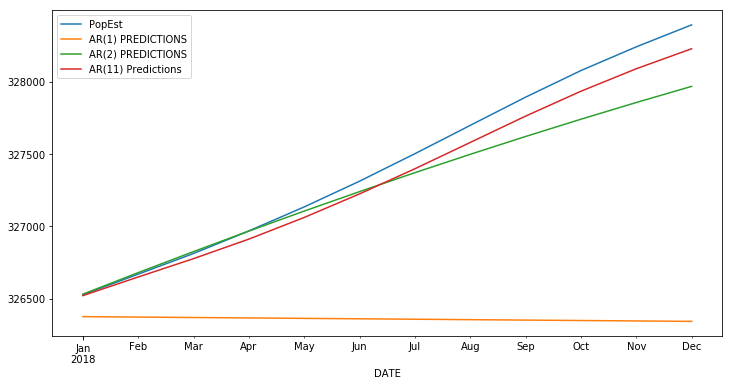

In [26]:
test['PopEst'].plot(figsize=(12, 6), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True);

#### Evaluate Model

In [27]:
from sklearn.metrics import mean_squared_error

In [30]:
labels = ['AR(1)', 'AR(2)', 'AR(11)']
preds = [predictions1, predictions2, predictions11]
for i in range(len(labels)):
    error = np.sqrt(mean_squared_error(test['PopEst'], preds[i]))
    print(f'{labels[i]} Error: {int(round(error))}')

AR(1) Error: 1240
AR(2) Error: 220
AR(11) Error: 104


In [31]:
# Another evaluation method is AIC, which does better job of evaluating models
# by avoiding overfitting. If a more complex models performs slightly better 
# than a simple model, the complex model will be highly penalized (because its just not worth it)

In [33]:
models = [AR1fit, AR2fit, ARfit]
for i in range(len(models)):
    print(f'{labels[i]} AIC: {round(models[i].aic, 3)}')

AR(1) AIC: 3.479
AR(2) AIC: 3.503
AR(11) AIC: 3.717


#### 3.Forecasting

In [34]:
model = AR(df['PopEst'])
ARfit = model.fit(maxlag=11, method='mle')

In [35]:
start = len(df)
# forecasting period length should be around testing data length
end = len(df) + 12

forecast = ARfit.predict(start=start, end=end).rename('Forecast')

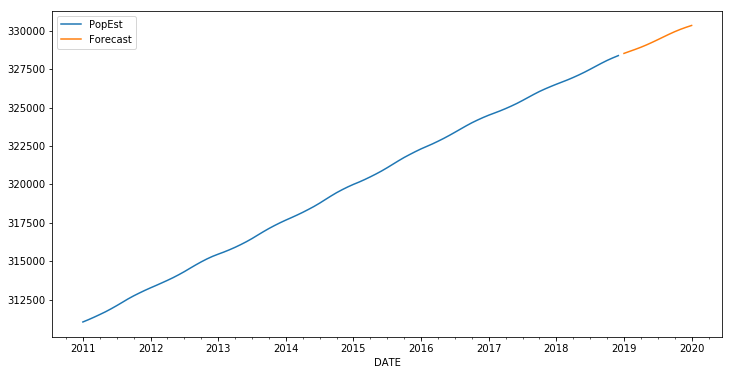

In [36]:
df['PopEst'].plot(figsize=(12, 6), legend=True)
forecast.plot(legend=True);